In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import catboost as cb
from sklearn.metrics import accuracy_score, f1_score

pd.set_option("max_columns", 999)
pd.set_option("max_rows", 999)

# 모델설정
sm = SMOTE(ratio='auto', kind='regular')

In [2]:
final = pd.read_csv('data_1_train.csv')
model_data = final.copy()

In [20]:
model_data.head()

,trade_go,trade_come,sell_to_shop,mail_go,mail_come,invite,join,fight,friend_num,friend_num_change_count,trade_go_perday,buy_from_shop_perday,sell_to_shop_perday,mail_come_perday,invite_perday,join_perday,fight_perday,login_count,play_time,max_level,playtime_per_day,sit_count,exp_get_amout,money_get_count,teleport_count,killed_by_pc,killed_by_npc,reborn_count,sit_count_perday,login_total_day,item_get_count_perday,money_get_count_perday,use_portal_count_perday,teleport_count_perday,total_party_time,sit_count/play_time,killed_by_pc/play_time,killed_by_npc/play_time,total-party_time/play_time,teleport_count/play_time,play_time/login_count,exp_get_amount/play_time,playtime_per_day/login_total_day,max_level/login_count,reborn_count/login_count,sit_count/max_level,play_time/question_count,class
0,0,2,106,1,3,1,26,0,0,0,0.000000,2.714286,15.142857,0.428571,0.142857,3.714286,0.000000,140,278194,0,39742.00000,153,185380599,2319,199,31,20,37,21.857143,7,612.000000,331.285714,0.0,28.428571,6107,0.000550,0.000111,0.000072,0.021952,0.000715,1987.100000,666.371665,5677.428571,0.000000,0.264286,0.000000,15455.222220,0
1,1,0,59,0,25,6,17,0,0,0,0.166667,2.833333,9.833333,4.166667,1.000000,2.833333,0.000000,14,206335,0,34389.16667,77,45703651,813,193,25,42,49,12.833333,6,6093.333333,135.500000,0.0,32.166667,36535,0.000373,0.000121,0.000204,0.177066,0.000935,14738.214290,221.502174,5731.527778,0.000000,3.500000,0.000000,65.858602,0
2,0,3,157,0,1,4,23,0,0,0,0.000000,1.833333,26.166667,0.166667,0.666667,3.833333,0.000000,19,113732,35,18955.33333,194,51063526,465,168,16,28,32,32.333333,6,1957.833333,77.500000,0.0,28.000000,14141,0.001706,0.000141,0.000246,0.124336,0.001477,5985.894737,448.981166,3159.222222,1.842105,1.684211,5.542857,2992.947368,0
3,47,16,215,0,0,0,0,0,0,0,6.714286,0.714286,30.714286,0.000000,0.000000,0.000000,0.000000,12,535682,0,76526.00000,5,618893581,2007,15,0,0,0,0.714286,7,6972.857143,286.714286,0.0,2.142857,0,0.000009,0.000000,0.000000,0.000000,0.000028,44640.166670,1155.337646,10932.285710,0.000000,0.000000,0.000000,0.000000,0
4,4,9,115,5,29,51,45,13,0,0,0.571429,4.142857,16.428571,4.142857,7.285714,6.428571,1.857143,51,200852,0,28693.14286,174,206108846,1739,288,140,43,121,24.857143,7,7030.428571,248.428571,0.0,41.142857,17229,0.000866,0.000697,0.000214,0.085780,0.001434,3938.274510,1026.172734,4099.020408,0.000000,2.372549,0.000000,5285.578947,0


In [4]:
del model_data['sell_to_person']
del model_data['too_much_gain']
del model_data['too_much_AP']
del model_data['abyss']

In [21]:
x = model_data.iloc[:,:-1]
y = model_data.iloc[:,-1]

# Create Dataset

In [22]:
print(list(y).count(0))
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

28201


In [652]:
# X_resampled, Y_resampled = sm.fit_sample(x_train,list(y_train))

# Basic CatBoost Test

In [669]:
cb_clf1 = cb.CatBoostClassifier(
                task_type='CPU',
                border_count=11,
                depth = 8,
                learning_rate = 0.028,
                iterations = 1050,
                thread_count = 4)

In [670]:
cb_clf2 = cb.CatBoostClassifier()

In [671]:
cb_clf3 = cb.CatBoostClassifier(
                task_type='CPU',
                border_count=11,
                depth = 8,
                learning_rate = 0.02,
                iterations = 1600,
                thread_count = 4)

In [7]:
cb_clf4 = cb.CatBoostClassifier(
                task_type='CPU',
                border_count=13,
                depth = 9,
                learning_rate = 0.02,
                iterations = 1600,
                thread_count = 4)

In [674]:
cb_clf1.fit(x, y)

0:	learn: 0.6422210	total: 16.2ms	remaining: 17s
1:	learn: 0.5966976	total: 29.4ms	remaining: 15.4s
2:	learn: 0.5524362	total: 45ms	remaining: 15.7s
3:	learn: 0.5120330	total: 59.1ms	remaining: 15.4s
4:	learn: 0.4754492	total: 72.8ms	remaining: 15.2s
5:	learn: 0.4417237	total: 87ms	remaining: 15.1s
6:	learn: 0.4124884	total: 100ms	remaining: 14.9s
7:	learn: 0.3844952	total: 118ms	remaining: 15.4s
8:	learn: 0.3592420	total: 134ms	remaining: 15.5s
9:	learn: 0.3378849	total: 151ms	remaining: 15.7s
10:	learn: 0.3179139	total: 167ms	remaining: 15.8s
11:	learn: 0.3007720	total: 183ms	remaining: 15.8s
12:	learn: 0.2839543	total: 200ms	remaining: 15.9s
13:	learn: 0.2690167	total: 222ms	remaining: 16.4s
14:	learn: 0.2548548	total: 240ms	remaining: 16.5s
15:	learn: 0.2425032	total: 258ms	remaining: 16.6s
16:	learn: 0.2314123	total: 274ms	remaining: 16.6s
17:	learn: 0.2209489	total: 290ms	remaining: 16.6s
18:	learn: 0.2112564	total: 311ms	remaining: 16.9s
19:	learn: 0.2023686	total: 331ms	remaini

171:	learn: 0.0696534	total: 2.55s	remaining: 13s
172:	learn: 0.0695015	total: 2.56s	remaining: 13s
173:	learn: 0.0693608	total: 2.58s	remaining: 13s
174:	learn: 0.0692712	total: 2.59s	remaining: 13s
175:	learn: 0.0691302	total: 2.61s	remaining: 13s
176:	learn: 0.0690276	total: 2.62s	remaining: 12.9s
177:	learn: 0.0688771	total: 2.63s	remaining: 12.9s
178:	learn: 0.0687267	total: 2.65s	remaining: 12.9s
179:	learn: 0.0686174	total: 2.66s	remaining: 12.9s
180:	learn: 0.0684699	total: 2.67s	remaining: 12.8s
181:	learn: 0.0683614	total: 2.68s	remaining: 12.8s
182:	learn: 0.0682405	total: 2.69s	remaining: 12.8s
183:	learn: 0.0681116	total: 2.71s	remaining: 12.7s
184:	learn: 0.0679746	total: 2.72s	remaining: 12.7s
185:	learn: 0.0678805	total: 2.74s	remaining: 12.7s
186:	learn: 0.0677480	total: 2.75s	remaining: 12.7s
187:	learn: 0.0676080	total: 2.77s	remaining: 12.7s
188:	learn: 0.0674181	total: 2.78s	remaining: 12.7s
189:	learn: 0.0673284	total: 2.79s	remaining: 12.6s
190:	learn: 0.0672409	

340:	learn: 0.0526943	total: 4.86s	remaining: 10.1s
341:	learn: 0.0525932	total: 4.88s	remaining: 10.1s
342:	learn: 0.0524506	total: 4.89s	remaining: 10.1s
343:	learn: 0.0523627	total: 4.91s	remaining: 10.1s
344:	learn: 0.0522447	total: 4.93s	remaining: 10.1s
345:	learn: 0.0521272	total: 4.94s	remaining: 10.1s
346:	learn: 0.0520304	total: 4.96s	remaining: 10s
347:	learn: 0.0519544	total: 4.97s	remaining: 10s
348:	learn: 0.0518785	total: 4.99s	remaining: 10s
349:	learn: 0.0517991	total: 5s	remaining: 10s
350:	learn: 0.0517105	total: 5.02s	remaining: 9.99s
351:	learn: 0.0516426	total: 5.03s	remaining: 9.98s
352:	learn: 0.0515701	total: 5.05s	remaining: 9.97s
353:	learn: 0.0514874	total: 5.06s	remaining: 9.96s
354:	learn: 0.0514096	total: 5.08s	remaining: 9.95s
355:	learn: 0.0513570	total: 5.1s	remaining: 9.94s
356:	learn: 0.0512958	total: 5.12s	remaining: 9.93s
357:	learn: 0.0512507	total: 5.13s	remaining: 9.93s
358:	learn: 0.0511807	total: 5.15s	remaining: 9.91s
359:	learn: 0.0511198	to

508:	learn: 0.0414260	total: 7.7s	remaining: 8.18s
509:	learn: 0.0413836	total: 7.72s	remaining: 8.17s
510:	learn: 0.0413241	total: 7.73s	remaining: 8.16s
511:	learn: 0.0412670	total: 7.75s	remaining: 8.15s
512:	learn: 0.0412001	total: 7.77s	remaining: 8.14s
513:	learn: 0.0411496	total: 7.79s	remaining: 8.12s
514:	learn: 0.0410636	total: 7.81s	remaining: 8.11s
515:	learn: 0.0410072	total: 7.83s	remaining: 8.1s
516:	learn: 0.0409575	total: 7.84s	remaining: 8.09s
517:	learn: 0.0409106	total: 7.86s	remaining: 8.07s
518:	learn: 0.0408765	total: 7.88s	remaining: 8.06s
519:	learn: 0.0408348	total: 7.9s	remaining: 8.05s
520:	learn: 0.0407630	total: 7.92s	remaining: 8.04s
521:	learn: 0.0407111	total: 7.94s	remaining: 8.03s
522:	learn: 0.0406217	total: 7.96s	remaining: 8.02s
523:	learn: 0.0405571	total: 7.97s	remaining: 8s
524:	learn: 0.0404681	total: 7.99s	remaining: 7.99s
525:	learn: 0.0404370	total: 8.01s	remaining: 7.98s
526:	learn: 0.0404003	total: 8.03s	remaining: 7.97s
527:	learn: 0.0403

673:	learn: 0.0322545	total: 10.7s	remaining: 5.96s
674:	learn: 0.0321987	total: 10.7s	remaining: 5.94s
675:	learn: 0.0321543	total: 10.7s	remaining: 5.93s
676:	learn: 0.0321310	total: 10.7s	remaining: 5.91s
677:	learn: 0.0320935	total: 10.8s	remaining: 5.9s
678:	learn: 0.0320485	total: 10.8s	remaining: 5.89s
679:	learn: 0.0319991	total: 10.8s	remaining: 5.87s
680:	learn: 0.0319547	total: 10.8s	remaining: 5.86s
681:	learn: 0.0319210	total: 10.8s	remaining: 5.84s
682:	learn: 0.0318787	total: 10.8s	remaining: 5.83s
683:	learn: 0.0318305	total: 10.9s	remaining: 5.81s
684:	learn: 0.0317941	total: 10.9s	remaining: 5.79s
685:	learn: 0.0317519	total: 10.9s	remaining: 5.78s
686:	learn: 0.0317042	total: 10.9s	remaining: 5.76s
687:	learn: 0.0316754	total: 10.9s	remaining: 5.75s
688:	learn: 0.0316378	total: 10.9s	remaining: 5.74s
689:	learn: 0.0316003	total: 11s	remaining: 5.72s
690:	learn: 0.0315654	total: 11s	remaining: 5.71s
691:	learn: 0.0315458	total: 11s	remaining: 5.69s
692:	learn: 0.03148

832:	learn: 0.0261345	total: 13.5s	remaining: 3.52s
833:	learn: 0.0260951	total: 13.5s	remaining: 3.51s
834:	learn: 0.0260641	total: 13.6s	remaining: 3.49s
835:	learn: 0.0260315	total: 13.6s	remaining: 3.48s
836:	learn: 0.0259893	total: 13.6s	remaining: 3.46s
837:	learn: 0.0259790	total: 13.6s	remaining: 3.44s
838:	learn: 0.0259483	total: 13.6s	remaining: 3.43s
839:	learn: 0.0259213	total: 13.6s	remaining: 3.41s
840:	learn: 0.0258872	total: 13.7s	remaining: 3.4s
841:	learn: 0.0258550	total: 13.7s	remaining: 3.38s
842:	learn: 0.0258342	total: 13.7s	remaining: 3.36s
843:	learn: 0.0258119	total: 13.7s	remaining: 3.35s
844:	learn: 0.0257864	total: 13.7s	remaining: 3.33s
845:	learn: 0.0257554	total: 13.7s	remaining: 3.31s
846:	learn: 0.0257176	total: 13.8s	remaining: 3.3s
847:	learn: 0.0256790	total: 13.8s	remaining: 3.28s
848:	learn: 0.0256582	total: 13.8s	remaining: 3.27s
849:	learn: 0.0256261	total: 13.8s	remaining: 3.25s
850:	learn: 0.0255876	total: 13.8s	remaining: 3.23s
851:	learn: 0.

996:	learn: 0.0214847	total: 16.5s	remaining: 878ms
997:	learn: 0.0214496	total: 16.5s	remaining: 862ms
998:	learn: 0.0214104	total: 16.6s	remaining: 845ms
999:	learn: 0.0213792	total: 16.6s	remaining: 829ms
1000:	learn: 0.0213488	total: 16.6s	remaining: 812ms
1001:	learn: 0.0213190	total: 16.6s	remaining: 796ms
1002:	learn: 0.0212974	total: 16.6s	remaining: 779ms
1003:	learn: 0.0212606	total: 16.6s	remaining: 763ms
1004:	learn: 0.0212383	total: 16.7s	remaining: 746ms
1005:	learn: 0.0212178	total: 16.7s	remaining: 729ms
1006:	learn: 0.0211939	total: 16.7s	remaining: 713ms
1007:	learn: 0.0211570	total: 16.7s	remaining: 697ms
1008:	learn: 0.0211268	total: 16.7s	remaining: 680ms
1009:	learn: 0.0210977	total: 16.8s	remaining: 664ms
1010:	learn: 0.0210763	total: 16.8s	remaining: 647ms
1011:	learn: 0.0210593	total: 16.8s	remaining: 631ms
1012:	learn: 0.0210467	total: 16.8s	remaining: 614ms
1013:	learn: 0.0210340	total: 16.8s	remaining: 598ms
1014:	learn: 0.0210037	total: 16.9s	remaining: 581

In [675]:
cb_clf2.fit(x, y)

Learning rate set to 0.043921
0:	learn: 0.6173375	total: 29.7ms	remaining: 29.6s
1:	learn: 0.5476086	total: 47.8ms	remaining: 23.9s
2:	learn: 0.4903115	total: 64.7ms	remaining: 21.5s
3:	learn: 0.4422770	total: 81.7ms	remaining: 20.3s
4:	learn: 0.3992924	total: 99ms	remaining: 19.7s
5:	learn: 0.3614643	total: 117ms	remaining: 19.4s
6:	learn: 0.3295117	total: 138ms	remaining: 19.6s
7:	learn: 0.3026699	total: 157ms	remaining: 19.4s
8:	learn: 0.2791476	total: 176ms	remaining: 19.4s
9:	learn: 0.2575225	total: 199ms	remaining: 19.7s
10:	learn: 0.2385349	total: 224ms	remaining: 20.1s
11:	learn: 0.2247926	total: 248ms	remaining: 20.4s
12:	learn: 0.2110280	total: 279ms	remaining: 21.2s
13:	learn: 0.1996942	total: 301ms	remaining: 21.2s
14:	learn: 0.1893135	total: 322ms	remaining: 21.2s
15:	learn: 0.1793162	total: 342ms	remaining: 21s
16:	learn: 0.1709179	total: 362ms	remaining: 20.9s
17:	learn: 0.1631485	total: 386ms	remaining: 21.1s
18:	learn: 0.1567653	total: 407ms	remaining: 21s
19:	learn: 0

161:	learn: 0.0774769	total: 4.1s	remaining: 21.2s
162:	learn: 0.0774384	total: 4.13s	remaining: 21.2s
163:	learn: 0.0772881	total: 4.16s	remaining: 21.2s
164:	learn: 0.0771833	total: 4.18s	remaining: 21.1s
165:	learn: 0.0771040	total: 4.2s	remaining: 21.1s
166:	learn: 0.0769926	total: 4.22s	remaining: 21s
167:	learn: 0.0768166	total: 4.24s	remaining: 21s
168:	learn: 0.0767339	total: 4.26s	remaining: 21s
169:	learn: 0.0766707	total: 4.28s	remaining: 20.9s
170:	learn: 0.0766220	total: 4.3s	remaining: 20.9s
171:	learn: 0.0765211	total: 4.33s	remaining: 20.8s
172:	learn: 0.0764661	total: 4.35s	remaining: 20.8s
173:	learn: 0.0763410	total: 4.37s	remaining: 20.8s
174:	learn: 0.0762383	total: 4.4s	remaining: 20.7s
175:	learn: 0.0761375	total: 4.44s	remaining: 20.8s
176:	learn: 0.0760302	total: 4.47s	remaining: 20.8s
177:	learn: 0.0759205	total: 4.5s	remaining: 20.8s
178:	learn: 0.0758489	total: 4.53s	remaining: 20.8s
179:	learn: 0.0757537	total: 4.55s	remaining: 20.7s
180:	learn: 0.0756621	t

322:	learn: 0.0643023	total: 8.14s	remaining: 17.1s
323:	learn: 0.0642704	total: 8.16s	remaining: 17s
324:	learn: 0.0642026	total: 8.2s	remaining: 17s
325:	learn: 0.0641652	total: 8.22s	remaining: 17s
326:	learn: 0.0640552	total: 8.25s	remaining: 17s
327:	learn: 0.0639780	total: 8.27s	remaining: 16.9s
328:	learn: 0.0639180	total: 8.29s	remaining: 16.9s
329:	learn: 0.0638619	total: 8.31s	remaining: 16.9s
330:	learn: 0.0638034	total: 8.34s	remaining: 16.8s
331:	learn: 0.0637253	total: 8.36s	remaining: 16.8s
332:	learn: 0.0636587	total: 8.39s	remaining: 16.8s
333:	learn: 0.0636165	total: 8.41s	remaining: 16.8s
334:	learn: 0.0635952	total: 8.43s	remaining: 16.7s
335:	learn: 0.0635565	total: 8.46s	remaining: 16.7s
336:	learn: 0.0635113	total: 8.48s	remaining: 16.7s
337:	learn: 0.0634833	total: 8.5s	remaining: 16.6s
338:	learn: 0.0634276	total: 8.52s	remaining: 16.6s
339:	learn: 0.0634017	total: 8.55s	remaining: 16.6s
340:	learn: 0.0633309	total: 8.57s	remaining: 16.6s
341:	learn: 0.0632961	

487:	learn: 0.0558035	total: 12s	remaining: 12.5s
488:	learn: 0.0557431	total: 12s	remaining: 12.5s
489:	learn: 0.0556725	total: 12s	remaining: 12.5s
490:	learn: 0.0556363	total: 12s	remaining: 12.5s
491:	learn: 0.0556027	total: 12.1s	remaining: 12.5s
492:	learn: 0.0555845	total: 12.1s	remaining: 12.4s
493:	learn: 0.0555198	total: 12.1s	remaining: 12.4s
494:	learn: 0.0554353	total: 12.1s	remaining: 12.4s
495:	learn: 0.0554036	total: 12.2s	remaining: 12.4s
496:	learn: 0.0553358	total: 12.2s	remaining: 12.3s
497:	learn: 0.0552708	total: 12.2s	remaining: 12.3s
498:	learn: 0.0552027	total: 12.2s	remaining: 12.3s
499:	learn: 0.0551426	total: 12.3s	remaining: 12.3s
500:	learn: 0.0550844	total: 12.3s	remaining: 12.2s
501:	learn: 0.0550633	total: 12.3s	remaining: 12.2s
502:	learn: 0.0550382	total: 12.3s	remaining: 12.2s
503:	learn: 0.0550085	total: 12.3s	remaining: 12.2s
504:	learn: 0.0549688	total: 12.4s	remaining: 12.1s
505:	learn: 0.0549194	total: 12.4s	remaining: 12.1s
506:	learn: 0.054894

648:	learn: 0.0492641	total: 16s	remaining: 8.64s
649:	learn: 0.0492271	total: 16s	remaining: 8.61s
650:	learn: 0.0491777	total: 16s	remaining: 8.59s
651:	learn: 0.0491306	total: 16s	remaining: 8.56s
652:	learn: 0.0490939	total: 16.1s	remaining: 8.54s
653:	learn: 0.0490370	total: 16.1s	remaining: 8.51s
654:	learn: 0.0489809	total: 16.1s	remaining: 8.48s
655:	learn: 0.0489347	total: 16.1s	remaining: 8.46s
656:	learn: 0.0488739	total: 16.1s	remaining: 8.43s
657:	learn: 0.0488172	total: 16.2s	remaining: 8.4s
658:	learn: 0.0487830	total: 16.2s	remaining: 8.38s
659:	learn: 0.0487312	total: 16.2s	remaining: 8.35s
660:	learn: 0.0487133	total: 16.2s	remaining: 8.32s
661:	learn: 0.0487059	total: 16.3s	remaining: 8.3s
662:	learn: 0.0486688	total: 16.3s	remaining: 8.27s
663:	learn: 0.0486237	total: 16.3s	remaining: 8.24s
664:	learn: 0.0486158	total: 16.3s	remaining: 8.22s
665:	learn: 0.0486002	total: 16.3s	remaining: 8.19s
666:	learn: 0.0485414	total: 16.4s	remaining: 8.17s
667:	learn: 0.0485025	

813:	learn: 0.0438129	total: 20.1s	remaining: 4.58s
814:	learn: 0.0437867	total: 20.1s	remaining: 4.56s
815:	learn: 0.0437352	total: 20.1s	remaining: 4.53s
816:	learn: 0.0436996	total: 20.1s	remaining: 4.51s
817:	learn: 0.0436661	total: 20.2s	remaining: 4.48s
818:	learn: 0.0436361	total: 20.2s	remaining: 4.46s
819:	learn: 0.0436126	total: 20.2s	remaining: 4.43s
820:	learn: 0.0435901	total: 20.2s	remaining: 4.41s
821:	learn: 0.0435653	total: 20.2s	remaining: 4.38s
822:	learn: 0.0435479	total: 20.3s	remaining: 4.36s
823:	learn: 0.0434867	total: 20.3s	remaining: 4.34s
824:	learn: 0.0434614	total: 20.3s	remaining: 4.31s
825:	learn: 0.0434512	total: 20.4s	remaining: 4.29s
826:	learn: 0.0434427	total: 20.4s	remaining: 4.26s
827:	learn: 0.0434261	total: 20.4s	remaining: 4.24s
828:	learn: 0.0434061	total: 20.4s	remaining: 4.21s
829:	learn: 0.0433946	total: 20.4s	remaining: 4.19s
830:	learn: 0.0433691	total: 20.5s	remaining: 4.16s
831:	learn: 0.0433432	total: 20.5s	remaining: 4.14s
832:	learn: 

974:	learn: 0.0389221	total: 23.9s	remaining: 612ms
975:	learn: 0.0388843	total: 23.9s	remaining: 588ms
976:	learn: 0.0388730	total: 23.9s	remaining: 563ms
977:	learn: 0.0388541	total: 24s	remaining: 539ms
978:	learn: 0.0388102	total: 24s	remaining: 514ms
979:	learn: 0.0387855	total: 24s	remaining: 490ms
980:	learn: 0.0387826	total: 24s	remaining: 465ms
981:	learn: 0.0387445	total: 24s	remaining: 441ms
982:	learn: 0.0387297	total: 24.1s	remaining: 416ms
983:	learn: 0.0387211	total: 24.1s	remaining: 392ms
984:	learn: 0.0386980	total: 24.1s	remaining: 367ms
985:	learn: 0.0386713	total: 24.1s	remaining: 343ms
986:	learn: 0.0386521	total: 24.2s	remaining: 318ms
987:	learn: 0.0386285	total: 24.2s	remaining: 294ms
988:	learn: 0.0386133	total: 24.2s	remaining: 269ms
989:	learn: 0.0385999	total: 24.2s	remaining: 245ms
990:	learn: 0.0385721	total: 24.2s	remaining: 220ms
991:	learn: 0.0385541	total: 24.3s	remaining: 196ms
992:	learn: 0.0385359	total: 24.3s	remaining: 171ms
993:	learn: 0.0385188	

In [23]:
cb_clf3.fit(x_train, y_train)

NameError: name 'cb_clf3' is not defined

In [24]:
cb_clf4.fit(x_train, y_train)

0:	learn: 0.6552949	total: 18.4ms	remaining: 29.5s
1:	learn: 0.6187331	total: 34.7ms	remaining: 27.8s
2:	learn: 0.5853909	total: 49.8ms	remaining: 26.5s
3:	learn: 0.5535970	total: 65.3ms	remaining: 26s
4:	learn: 0.5235107	total: 81.3ms	remaining: 25.9s
5:	learn: 0.4967195	total: 96.4ms	remaining: 25.6s
6:	learn: 0.4715642	total: 112ms	remaining: 25.4s
7:	learn: 0.4473722	total: 129ms	remaining: 25.6s
8:	learn: 0.4254434	total: 144ms	remaining: 25.4s
9:	learn: 0.4053855	total: 160ms	remaining: 25.5s
10:	learn: 0.3870589	total: 180ms	remaining: 26s
11:	learn: 0.3692727	total: 195ms	remaining: 25.7s
12:	learn: 0.3520733	total: 208ms	remaining: 25.4s
13:	learn: 0.3364485	total: 224ms	remaining: 25.3s
14:	learn: 0.3225878	total: 240ms	remaining: 25.3s
15:	learn: 0.3089021	total: 256ms	remaining: 25.3s
16:	learn: 0.2960421	total: 274ms	remaining: 25.5s
17:	learn: 0.2843407	total: 294ms	remaining: 25.8s
18:	learn: 0.2735861	total: 308ms	remaining: 25.6s
19:	learn: 0.2629859	total: 322ms	remai

167:	learn: 0.0682379	total: 2.6s	remaining: 22.2s
168:	learn: 0.0680642	total: 2.62s	remaining: 22.2s
169:	learn: 0.0679092	total: 2.64s	remaining: 22.2s
170:	learn: 0.0677584	total: 2.65s	remaining: 22.2s
171:	learn: 0.0676179	total: 2.67s	remaining: 22.2s
172:	learn: 0.0674099	total: 2.69s	remaining: 22.2s
173:	learn: 0.0672829	total: 2.7s	remaining: 22.1s
174:	learn: 0.0671737	total: 2.71s	remaining: 22.1s
175:	learn: 0.0670269	total: 2.73s	remaining: 22.1s
176:	learn: 0.0668728	total: 2.75s	remaining: 22.1s
177:	learn: 0.0666922	total: 2.76s	remaining: 22s
178:	learn: 0.0665245	total: 2.77s	remaining: 22s
179:	learn: 0.0663946	total: 2.79s	remaining: 22s
180:	learn: 0.0662885	total: 2.8s	remaining: 22s
181:	learn: 0.0661922	total: 2.82s	remaining: 22s
182:	learn: 0.0660746	total: 2.83s	remaining: 21.9s
183:	learn: 0.0659132	total: 2.85s	remaining: 21.9s
184:	learn: 0.0657646	total: 2.86s	remaining: 21.9s
185:	learn: 0.0656230	total: 2.88s	remaining: 21.9s
186:	learn: 0.0655384	tot

334:	learn: 0.0493138	total: 5.19s	remaining: 19.6s
335:	learn: 0.0492416	total: 5.2s	remaining: 19.6s
336:	learn: 0.0491677	total: 5.22s	remaining: 19.5s
337:	learn: 0.0490931	total: 5.23s	remaining: 19.5s
338:	learn: 0.0490117	total: 5.25s	remaining: 19.5s
339:	learn: 0.0489204	total: 5.26s	remaining: 19.5s
340:	learn: 0.0488645	total: 5.28s	remaining: 19.5s
341:	learn: 0.0487879	total: 5.29s	remaining: 19.5s
342:	learn: 0.0486814	total: 5.3s	remaining: 19.4s
343:	learn: 0.0485922	total: 5.32s	remaining: 19.4s
344:	learn: 0.0485055	total: 5.33s	remaining: 19.4s
345:	learn: 0.0484255	total: 5.35s	remaining: 19.4s
346:	learn: 0.0483306	total: 5.37s	remaining: 19.4s
347:	learn: 0.0482349	total: 5.38s	remaining: 19.4s
348:	learn: 0.0481737	total: 5.4s	remaining: 19.4s
349:	learn: 0.0480595	total: 5.42s	remaining: 19.4s
350:	learn: 0.0479636	total: 5.44s	remaining: 19.4s
351:	learn: 0.0479044	total: 5.46s	remaining: 19.4s
352:	learn: 0.0478382	total: 5.48s	remaining: 19.4s
353:	learn: 0.0

501:	learn: 0.0375812	total: 7.79s	remaining: 17s
502:	learn: 0.0375352	total: 7.81s	remaining: 17s
503:	learn: 0.0374757	total: 7.83s	remaining: 17s
504:	learn: 0.0374071	total: 7.84s	remaining: 17s
505:	learn: 0.0373375	total: 7.86s	remaining: 17s
506:	learn: 0.0372745	total: 7.87s	remaining: 17s
507:	learn: 0.0371951	total: 7.89s	remaining: 17s
508:	learn: 0.0371245	total: 7.91s	remaining: 17s
509:	learn: 0.0370447	total: 7.93s	remaining: 16.9s
510:	learn: 0.0369772	total: 7.95s	remaining: 16.9s
511:	learn: 0.0369195	total: 7.96s	remaining: 16.9s
512:	learn: 0.0368825	total: 7.98s	remaining: 16.9s
513:	learn: 0.0368321	total: 8s	remaining: 16.9s
514:	learn: 0.0367787	total: 8.01s	remaining: 16.9s
515:	learn: 0.0367037	total: 8.03s	remaining: 16.9s
516:	learn: 0.0366423	total: 8.05s	remaining: 16.9s
517:	learn: 0.0365878	total: 8.06s	remaining: 16.8s
518:	learn: 0.0365197	total: 8.07s	remaining: 16.8s
519:	learn: 0.0364924	total: 8.09s	remaining: 16.8s
520:	learn: 0.0364149	total: 8.

661:	learn: 0.0294943	total: 10.2s	remaining: 14.4s
662:	learn: 0.0294768	total: 10.2s	remaining: 14.4s
663:	learn: 0.0294035	total: 10.2s	remaining: 14.4s
664:	learn: 0.0293721	total: 10.2s	remaining: 14.4s
665:	learn: 0.0293322	total: 10.2s	remaining: 14.4s
666:	learn: 0.0292905	total: 10.3s	remaining: 14.3s
667:	learn: 0.0292496	total: 10.3s	remaining: 14.3s
668:	learn: 0.0292101	total: 10.3s	remaining: 14.3s
669:	learn: 0.0291740	total: 10.3s	remaining: 14.3s
670:	learn: 0.0290812	total: 10.3s	remaining: 14.3s
671:	learn: 0.0290339	total: 10.3s	remaining: 14.3s
672:	learn: 0.0289961	total: 10.3s	remaining: 14.2s
673:	learn: 0.0289587	total: 10.4s	remaining: 14.2s
674:	learn: 0.0289129	total: 10.4s	remaining: 14.2s
675:	learn: 0.0288835	total: 10.4s	remaining: 14.2s
676:	learn: 0.0288505	total: 10.4s	remaining: 14.2s
677:	learn: 0.0288166	total: 10.4s	remaining: 14.2s
678:	learn: 0.0287784	total: 10.4s	remaining: 14.1s
679:	learn: 0.0287423	total: 10.4s	remaining: 14.1s
680:	learn: 

821:	learn: 0.0238308	total: 12.6s	remaining: 11.9s
822:	learn: 0.0238068	total: 12.6s	remaining: 11.9s
823:	learn: 0.0237794	total: 12.6s	remaining: 11.9s
824:	learn: 0.0237464	total: 12.6s	remaining: 11.8s
825:	learn: 0.0237226	total: 12.6s	remaining: 11.8s
826:	learn: 0.0236957	total: 12.6s	remaining: 11.8s
827:	learn: 0.0236545	total: 12.7s	remaining: 11.8s
828:	learn: 0.0236213	total: 12.7s	remaining: 11.8s
829:	learn: 0.0235930	total: 12.7s	remaining: 11.8s
830:	learn: 0.0235537	total: 12.7s	remaining: 11.8s
831:	learn: 0.0235275	total: 12.7s	remaining: 11.7s
832:	learn: 0.0234926	total: 12.7s	remaining: 11.7s
833:	learn: 0.0234760	total: 12.7s	remaining: 11.7s
834:	learn: 0.0234403	total: 12.8s	remaining: 11.7s
835:	learn: 0.0234121	total: 12.8s	remaining: 11.7s
836:	learn: 0.0233776	total: 12.8s	remaining: 11.7s
837:	learn: 0.0233527	total: 12.8s	remaining: 11.6s
838:	learn: 0.0233095	total: 12.8s	remaining: 11.6s
839:	learn: 0.0232906	total: 12.8s	remaining: 11.6s
840:	learn: 

990:	learn: 0.0192109	total: 15.1s	remaining: 9.29s
991:	learn: 0.0191921	total: 15.1s	remaining: 9.28s
992:	learn: 0.0191663	total: 15.2s	remaining: 9.26s
993:	learn: 0.0191433	total: 15.2s	remaining: 9.25s
994:	learn: 0.0191317	total: 15.2s	remaining: 9.23s
995:	learn: 0.0191095	total: 15.2s	remaining: 9.22s
996:	learn: 0.0190869	total: 15.2s	remaining: 9.2s
997:	learn: 0.0190653	total: 15.2s	remaining: 9.19s
998:	learn: 0.0190288	total: 15.2s	remaining: 9.17s
999:	learn: 0.0189891	total: 15.3s	remaining: 9.16s
1000:	learn: 0.0189663	total: 15.3s	remaining: 9.15s
1001:	learn: 0.0189482	total: 15.3s	remaining: 9.13s
1002:	learn: 0.0189088	total: 15.3s	remaining: 9.12s
1003:	learn: 0.0188864	total: 15.3s	remaining: 9.11s
1004:	learn: 0.0188595	total: 15.4s	remaining: 9.09s
1005:	learn: 0.0188155	total: 15.4s	remaining: 9.08s
1006:	learn: 0.0187938	total: 15.4s	remaining: 9.07s
1007:	learn: 0.0187778	total: 15.4s	remaining: 9.05s
1008:	learn: 0.0187610	total: 15.4s	remaining: 9.04s
1009

1146:	learn: 0.0158698	total: 18.1s	remaining: 7.16s
1147:	learn: 0.0158471	total: 18.1s	remaining: 7.14s
1148:	learn: 0.0158156	total: 18.2s	remaining: 7.13s
1149:	learn: 0.0158026	total: 18.2s	remaining: 7.12s
1150:	learn: 0.0157876	total: 18.2s	remaining: 7.1s
1151:	learn: 0.0157755	total: 18.2s	remaining: 7.08s
1152:	learn: 0.0157628	total: 18.2s	remaining: 7.07s
1153:	learn: 0.0157392	total: 18.3s	remaining: 7.05s
1154:	learn: 0.0157268	total: 18.3s	remaining: 7.04s
1155:	learn: 0.0157086	total: 18.3s	remaining: 7.02s
1156:	learn: 0.0156935	total: 18.3s	remaining: 7.01s
1157:	learn: 0.0156595	total: 18.3s	remaining: 6.99s
1158:	learn: 0.0156443	total: 18.3s	remaining: 6.98s
1159:	learn: 0.0156197	total: 18.4s	remaining: 6.96s
1160:	learn: 0.0155869	total: 18.4s	remaining: 6.95s
1161:	learn: 0.0155605	total: 18.4s	remaining: 6.94s
1162:	learn: 0.0155422	total: 18.4s	remaining: 6.92s
1163:	learn: 0.0155198	total: 18.4s	remaining: 6.91s
1164:	learn: 0.0155061	total: 18.5s	remaining: 

1305:	learn: 0.0131856	total: 21.1s	remaining: 4.75s
1306:	learn: 0.0131693	total: 21.1s	remaining: 4.74s
1307:	learn: 0.0131454	total: 21.2s	remaining: 4.72s
1308:	learn: 0.0131394	total: 21.2s	remaining: 4.71s
1309:	learn: 0.0131264	total: 21.2s	remaining: 4.69s
1310:	learn: 0.0131160	total: 21.2s	remaining: 4.68s
1311:	learn: 0.0131053	total: 21.2s	remaining: 4.66s
1312:	learn: 0.0130839	total: 21.3s	remaining: 4.64s
1313:	learn: 0.0130670	total: 21.3s	remaining: 4.63s
1314:	learn: 0.0130397	total: 21.3s	remaining: 4.61s
1315:	learn: 0.0130272	total: 21.3s	remaining: 4.6s
1316:	learn: 0.0130149	total: 21.3s	remaining: 4.58s
1317:	learn: 0.0130035	total: 21.3s	remaining: 4.57s
1318:	learn: 0.0129857	total: 21.4s	remaining: 4.55s
1319:	learn: 0.0129755	total: 21.4s	remaining: 4.54s
1320:	learn: 0.0129639	total: 21.4s	remaining: 4.52s
1321:	learn: 0.0129544	total: 21.4s	remaining: 4.5s
1322:	learn: 0.0129383	total: 21.4s	remaining: 4.49s
1323:	learn: 0.0129229	total: 21.5s	remaining: 4

1466:	learn: 0.0111441	total: 24.1s	remaining: 2.19s
1467:	learn: 0.0111358	total: 24.1s	remaining: 2.17s
1468:	learn: 0.0111310	total: 24.1s	remaining: 2.15s
1469:	learn: 0.0111136	total: 24.2s	remaining: 2.14s
1470:	learn: 0.0111038	total: 24.2s	remaining: 2.12s
1471:	learn: 0.0110891	total: 24.2s	remaining: 2.1s
1472:	learn: 0.0110758	total: 24.2s	remaining: 2.09s
1473:	learn: 0.0110696	total: 24.2s	remaining: 2.07s
1474:	learn: 0.0110627	total: 24.3s	remaining: 2.06s
1475:	learn: 0.0110452	total: 24.3s	remaining: 2.04s
1476:	learn: 0.0110367	total: 24.3s	remaining: 2.02s
1477:	learn: 0.0110304	total: 24.3s	remaining: 2.01s
1478:	learn: 0.0110191	total: 24.3s	remaining: 1.99s
1479:	learn: 0.0110105	total: 24.4s	remaining: 1.98s
1480:	learn: 0.0110032	total: 24.4s	remaining: 1.96s
1481:	learn: 0.0109875	total: 24.4s	remaining: 1.94s
1482:	learn: 0.0109768	total: 24.4s	remaining: 1.93s
1483:	learn: 0.0109645	total: 24.4s	remaining: 1.91s
1484:	learn: 0.0109540	total: 24.5s	remaining: 

In [566]:
y_pred1 = cb_clf1.predict(x_test)

In [656]:
y_pred2 = cb_clf2.predict(x_test)

In [580]:
y_pred3 = cb_clf3.predict(x_test)

In [16]:
y_pred4 = cb_clf4.predict(x_test)

In [582]:
proba_cb1 = cb_clf1.predict_proba(x_test)[:,1]

In [661]:
proba_cb2 = cb_clf2.predict_proba(x_test)[:,1]

In [584]:
proba_cb3 = cb_clf3.predict_proba(x_test)[:,1]

In [598]:
proba_cb4 = cb_clf4.predict_proba(x_test)[:,1]

In [595]:
proba_cb = (proba_cb1 + proba_cb2 + proba_cb3 + proba_cb4) / 4

In [17]:
f1_score(y_pred4, y_test)

0.986784140969163

<BarContainer object of 51 artists>

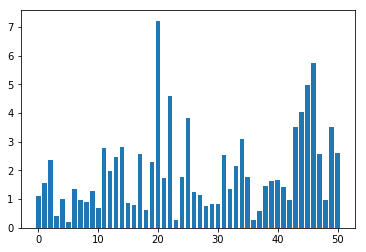

In [186]:
#Simple EDA. Feature Importance
plt.bar(range(len(cb_clf.feature_importances_)), cb_clf.feature_importances_)

<BarContainer object of 51 artists>

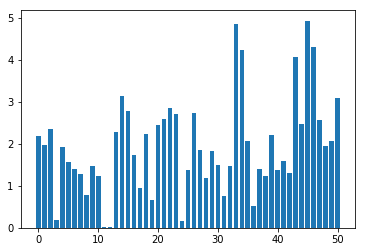

In [444]:
#Simple EDA. Feature Importance
plt.bar(range(len(cb_clf1.feature_importances_)), cb_clf1.feature_importances_)

In [452]:
model_data.columns[24]

'abyss'

# Basic Catboost Data Manipulation

In [25]:
proba_cb = cb_clf4.predict_proba(x_test)[:,1]

In [26]:
x1 = np.arange(0, 1.01, 0.01)
y1 = np.arange(0, 1.01, 0.01)
z1 = np.arange(0, 1.01, 0.01)

for i in np.arange(0, 1.01, 0.01):
    y_pred = ((proba_cb) > i).astype(int)
    y1[int(i*100)] = accuracy_score(y_test, y_pred)
    z1[int(i*100)] = f1_score(y_test, y_pred)

In [27]:
max(z1)

0.8279932546374368

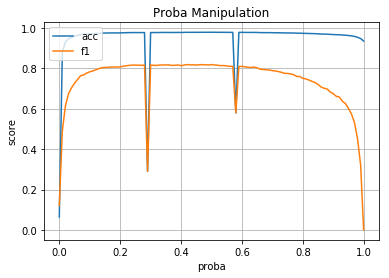

In [612]:
ax = plt.subplot(111)

ax.plot(x1, y1, label='acc')
ax.plot(x1, z1, label='f1')

ax.set(xlabel='proba', ylabel='score', title='Proba Manipulation')
ax.legend(loc='upper left')
ax.grid()

# Grid Search

In [526]:
# load libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt    
from catboost import CatBoostClassifier

In [29]:
depth = [3,1,2,6,4,5,7,8,9,10]
iterations = [1040, 1050, 1060] # [311,313,314]
learning_rate = [0.027, 0.028, 0.029] #[0.0875,0.088,0.0885]
l2_leaf_reg = [3,1,5,10,100]
border_count = [10,11,12,13]
ctr_border_count = [50,5,10,20,100,200]
thread_count = 4

parameters = {'depth': depth,
               'iterations': iterations,
               'learning_rate': learning_rate,
               'l2_leaf_reg ': l2_leaf_reg ,
               'border_count': border_count,
               'ctr_border_count': ctr_border_count,
               'thread_count' : thread_count}
print(parameters)

{'depth': [3, 1, 2, 6, 4, 5, 7, 8, 9, 10], 'iterations': [1040, 1050, 1060], 'learning_rate': [0.027, 0.028, 0.029], 'l2_leaf_reg ': [3, 1, 5, 10, 100], 'border_count': [10, 11, 12, 13], 'ctr_border_count': [50, 5, 10, 20, 100, 200], 'thread_count': 4}


In [543]:
import warnings
warnings.filterwarnings("ignore")

model = CatBoostClassifier()
parameters = {
                'border_count': [13],
                'depth': [9],
                'learning_rate': [0.015,0.02,0.25],
                'iterations': [1500,1600,1700],
                'thread_count' : [4]
             }

randm = RandomizedSearchCV(estimator=model, param_distributions = parameters, 
                           cv = 2, n_iter = 10, n_jobs=-1, scoring='f1')
randm.fit(x_train, y_train)

# Results from Random Search
print("\n========================================================")
print(" Results from Random Search " )
print("========================================================")    

print("\n The best estimator across ALL searched params:\n",
      randm.best_estimator_)

print("\n The best score across ALL searched params:\n",
      randm.best_score_)

print("\n The best parameters across ALL searched params:\n",
      randm.best_params_)

print("\n ========================================================")

0:	learn: 0.6546485	total: 23.5ms	remaining: 37.6s
1:	learn: 0.6183028	total: 42.7ms	remaining: 34.1s
2:	learn: 0.5851187	total: 60ms	remaining: 31.9s
3:	learn: 0.5526720	total: 78.8ms	remaining: 31.5s
4:	learn: 0.5228588	total: 97.9ms	remaining: 31.2s
5:	learn: 0.4960581	total: 117ms	remaining: 31s
6:	learn: 0.4710537	total: 136ms	remaining: 30.9s
7:	learn: 0.4470116	total: 155ms	remaining: 30.9s
8:	learn: 0.4248636	total: 174ms	remaining: 30.7s
9:	learn: 0.4055874	total: 193ms	remaining: 30.7s
10:	learn: 0.3870411	total: 211ms	remaining: 30.5s
11:	learn: 0.3691336	total: 235ms	remaining: 31s
12:	learn: 0.3522193	total: 258ms	remaining: 31.5s
13:	learn: 0.3362441	total: 283ms	remaining: 32.1s
14:	learn: 0.3221598	total: 309ms	remaining: 32.6s
15:	learn: 0.3083016	total: 336ms	remaining: 33.3s
16:	learn: 0.2960936	total: 358ms	remaining: 33.3s
17:	learn: 0.2833883	total: 379ms	remaining: 33.3s
18:	learn: 0.2725256	total: 402ms	remaining: 33.4s
19:	learn: 0.2618547	total: 428ms	remainin

162:	learn: 0.0684518	total: 3.84s	remaining: 33.9s
163:	learn: 0.0682611	total: 3.87s	remaining: 33.8s
164:	learn: 0.0680967	total: 3.89s	remaining: 33.8s
165:	learn: 0.0679619	total: 3.92s	remaining: 33.8s
166:	learn: 0.0677717	total: 3.94s	remaining: 33.8s
167:	learn: 0.0675829	total: 3.97s	remaining: 33.8s
168:	learn: 0.0674452	total: 3.99s	remaining: 33.8s
169:	learn: 0.0672823	total: 4.01s	remaining: 33.8s
170:	learn: 0.0670977	total: 4.04s	remaining: 33.7s
171:	learn: 0.0669519	total: 4.06s	remaining: 33.7s
172:	learn: 0.0667956	total: 4.09s	remaining: 33.7s
173:	learn: 0.0666768	total: 4.11s	remaining: 33.7s
174:	learn: 0.0665098	total: 4.13s	remaining: 33.6s
175:	learn: 0.0663090	total: 4.16s	remaining: 33.6s
176:	learn: 0.0661689	total: 4.18s	remaining: 33.6s
177:	learn: 0.0659993	total: 4.2s	remaining: 33.6s
178:	learn: 0.0658144	total: 4.22s	remaining: 33.5s
179:	learn: 0.0656510	total: 4.25s	remaining: 33.5s
180:	learn: 0.0654532	total: 4.27s	remaining: 33.5s
181:	learn: 0

327:	learn: 0.0487830	total: 7.9s	remaining: 30.6s
328:	learn: 0.0486748	total: 7.93s	remaining: 30.6s
329:	learn: 0.0486346	total: 7.95s	remaining: 30.6s
330:	learn: 0.0485320	total: 7.98s	remaining: 30.6s
331:	learn: 0.0484932	total: 8s	remaining: 30.6s
332:	learn: 0.0483870	total: 8.03s	remaining: 30.5s
333:	learn: 0.0483066	total: 8.05s	remaining: 30.5s
334:	learn: 0.0482003	total: 8.07s	remaining: 30.5s
335:	learn: 0.0481566	total: 8.1s	remaining: 30.5s
336:	learn: 0.0480839	total: 8.12s	remaining: 30.4s
337:	learn: 0.0479954	total: 8.15s	remaining: 30.4s
338:	learn: 0.0479145	total: 8.18s	remaining: 30.4s
339:	learn: 0.0478533	total: 8.2s	remaining: 30.4s
340:	learn: 0.0477522	total: 8.22s	remaining: 30.4s
341:	learn: 0.0476675	total: 8.25s	remaining: 30.3s
342:	learn: 0.0475597	total: 8.27s	remaining: 30.3s
343:	learn: 0.0474877	total: 8.3s	remaining: 30.3s
344:	learn: 0.0473813	total: 8.32s	remaining: 30.3s
345:	learn: 0.0473005	total: 8.35s	remaining: 30.3s
346:	learn: 0.04716

486:	learn: 0.0378326	total: 11.6s	remaining: 26.4s
487:	learn: 0.0377713	total: 11.6s	remaining: 26.4s
488:	learn: 0.0377307	total: 11.6s	remaining: 26.4s
489:	learn: 0.0376664	total: 11.6s	remaining: 26.3s
490:	learn: 0.0375944	total: 11.6s	remaining: 26.3s
491:	learn: 0.0375461	total: 11.7s	remaining: 26.3s
492:	learn: 0.0374915	total: 11.7s	remaining: 26.3s
493:	learn: 0.0374289	total: 11.7s	remaining: 26.2s
494:	learn: 0.0373429	total: 11.7s	remaining: 26.2s
495:	learn: 0.0372796	total: 11.8s	remaining: 26.2s
496:	learn: 0.0372417	total: 11.8s	remaining: 26.1s
497:	learn: 0.0371826	total: 11.8s	remaining: 26.1s
498:	learn: 0.0371490	total: 11.8s	remaining: 26.1s
499:	learn: 0.0370705	total: 11.8s	remaining: 26s
500:	learn: 0.0369829	total: 11.9s	remaining: 26s
501:	learn: 0.0369394	total: 11.9s	remaining: 26s
502:	learn: 0.0368718	total: 11.9s	remaining: 25.9s
503:	learn: 0.0367888	total: 11.9s	remaining: 25.9s
504:	learn: 0.0367369	total: 11.9s	remaining: 25.9s
505:	learn: 0.0366

647:	learn: 0.0298148	total: 14.9s	remaining: 21.9s
648:	learn: 0.0297577	total: 14.9s	remaining: 21.9s
649:	learn: 0.0297257	total: 15s	remaining: 21.9s
650:	learn: 0.0296612	total: 15s	remaining: 21.9s
651:	learn: 0.0296223	total: 15s	remaining: 21.8s
652:	learn: 0.0295862	total: 15s	remaining: 21.8s
653:	learn: 0.0295533	total: 15.1s	remaining: 21.8s
654:	learn: 0.0295159	total: 15.1s	remaining: 21.8s
655:	learn: 0.0294747	total: 15.1s	remaining: 21.7s
656:	learn: 0.0294181	total: 15.1s	remaining: 21.7s
657:	learn: 0.0293470	total: 15.1s	remaining: 21.7s
658:	learn: 0.0293230	total: 15.2s	remaining: 21.7s
659:	learn: 0.0292755	total: 15.2s	remaining: 21.6s
660:	learn: 0.0292349	total: 15.2s	remaining: 21.6s
661:	learn: 0.0291938	total: 15.2s	remaining: 21.6s
662:	learn: 0.0291486	total: 15.2s	remaining: 21.5s
663:	learn: 0.0291118	total: 15.3s	remaining: 21.5s
664:	learn: 0.0290935	total: 15.3s	remaining: 21.5s
665:	learn: 0.0290143	total: 15.3s	remaining: 21.5s
666:	learn: 0.028980

808:	learn: 0.0237873	total: 18.3s	remaining: 17.9s
809:	learn: 0.0237732	total: 18.3s	remaining: 17.9s
810:	learn: 0.0237388	total: 18.3s	remaining: 17.8s
811:	learn: 0.0237139	total: 18.4s	remaining: 17.8s
812:	learn: 0.0236934	total: 18.4s	remaining: 17.8s
813:	learn: 0.0236669	total: 18.4s	remaining: 17.8s
814:	learn: 0.0235985	total: 18.4s	remaining: 17.7s
815:	learn: 0.0235718	total: 18.4s	remaining: 17.7s
816:	learn: 0.0235525	total: 18.5s	remaining: 17.7s
817:	learn: 0.0235340	total: 18.5s	remaining: 17.7s
818:	learn: 0.0234666	total: 18.5s	remaining: 17.6s
819:	learn: 0.0234401	total: 18.5s	remaining: 17.6s
820:	learn: 0.0233928	total: 18.5s	remaining: 17.6s
821:	learn: 0.0233464	total: 18.6s	remaining: 17.6s
822:	learn: 0.0232940	total: 18.6s	remaining: 17.6s
823:	learn: 0.0232620	total: 18.6s	remaining: 17.5s
824:	learn: 0.0232166	total: 18.6s	remaining: 17.5s
825:	learn: 0.0231863	total: 18.7s	remaining: 17.5s
826:	learn: 0.0231612	total: 18.7s	remaining: 17.5s
827:	learn: 

974:	learn: 0.0189663	total: 21.6s	remaining: 13.9s
975:	learn: 0.0189396	total: 21.7s	remaining: 13.9s
976:	learn: 0.0189225	total: 21.7s	remaining: 13.8s
977:	learn: 0.0188920	total: 21.7s	remaining: 13.8s
978:	learn: 0.0188696	total: 21.7s	remaining: 13.8s
979:	learn: 0.0188502	total: 21.8s	remaining: 13.8s
980:	learn: 0.0188492	total: 21.8s	remaining: 13.7s
981:	learn: 0.0188234	total: 21.8s	remaining: 13.7s
982:	learn: 0.0187964	total: 21.8s	remaining: 13.7s
983:	learn: 0.0187903	total: 21.8s	remaining: 13.7s
984:	learn: 0.0187660	total: 21.8s	remaining: 13.6s
985:	learn: 0.0187319	total: 21.9s	remaining: 13.6s
986:	learn: 0.0187222	total: 21.9s	remaining: 13.6s
987:	learn: 0.0186835	total: 21.9s	remaining: 13.6s
988:	learn: 0.0186485	total: 21.9s	remaining: 13.6s
989:	learn: 0.0186170	total: 22s	remaining: 13.5s
990:	learn: 0.0185911	total: 22s	remaining: 13.5s
991:	learn: 0.0185512	total: 22s	remaining: 13.5s
992:	learn: 0.0185326	total: 22s	remaining: 13.5s
993:	learn: 0.018511

1133:	learn: 0.0159432	total: 24.7s	remaining: 10.1s
1134:	learn: 0.0159131	total: 24.7s	remaining: 10.1s
1135:	learn: 0.0158921	total: 24.7s	remaining: 10.1s
1136:	learn: 0.0158828	total: 24.8s	remaining: 10.1s
1137:	learn: 0.0158693	total: 24.8s	remaining: 10.1s
1138:	learn: 0.0158542	total: 24.8s	remaining: 10s
1139:	learn: 0.0158352	total: 24.8s	remaining: 10s
1140:	learn: 0.0158167	total: 24.8s	remaining: 9.99s
1141:	learn: 0.0158046	total: 24.9s	remaining: 9.97s
1142:	learn: 0.0157773	total: 24.9s	remaining: 9.95s
1143:	learn: 0.0157655	total: 24.9s	remaining: 9.93s
1144:	learn: 0.0157471	total: 24.9s	remaining: 9.9s
1145:	learn: 0.0157393	total: 24.9s	remaining: 9.88s
1146:	learn: 0.0157360	total: 25s	remaining: 9.86s
1147:	learn: 0.0157218	total: 25s	remaining: 9.84s
1148:	learn: 0.0157039	total: 25s	remaining: 9.81s
1149:	learn: 0.0156873	total: 25s	remaining: 9.79s
1150:	learn: 0.0156588	total: 25s	remaining: 9.77s
1151:	learn: 0.0156374	total: 25.1s	remaining: 9.75s
1152:	le

1293:	learn: 0.0135756	total: 27.9s	remaining: 6.59s
1294:	learn: 0.0135652	total: 27.9s	remaining: 6.57s
1295:	learn: 0.0135482	total: 27.9s	remaining: 6.55s
1296:	learn: 0.0135282	total: 28s	remaining: 6.53s
1297:	learn: 0.0135165	total: 28s	remaining: 6.51s
1298:	learn: 0.0135053	total: 28s	remaining: 6.49s
1299:	learn: 0.0135049	total: 28s	remaining: 6.46s
1300:	learn: 0.0134950	total: 28s	remaining: 6.44s
1301:	learn: 0.0134760	total: 28s	remaining: 6.42s
1302:	learn: 0.0134626	total: 28.1s	remaining: 6.39s
1303:	learn: 0.0134529	total: 28.1s	remaining: 6.37s
1304:	learn: 0.0134351	total: 28.1s	remaining: 6.35s
1305:	learn: 0.0134185	total: 28.1s	remaining: 6.33s
1306:	learn: 0.0134022	total: 28.1s	remaining: 6.31s
1307:	learn: 0.0133864	total: 28.2s	remaining: 6.29s
1308:	learn: 0.0133777	total: 28.2s	remaining: 6.26s
1309:	learn: 0.0133600	total: 28.2s	remaining: 6.24s
1310:	learn: 0.0133425	total: 28.2s	remaining: 6.22s
1311:	learn: 0.0133332	total: 28.2s	remaining: 6.2s
1312:	

1456:	learn: 0.0115664	total: 31.1s	remaining: 3.05s
1457:	learn: 0.0115515	total: 31.1s	remaining: 3.03s
1458:	learn: 0.0115350	total: 31.1s	remaining: 3.01s
1459:	learn: 0.0115160	total: 31.2s	remaining: 2.99s
1460:	learn: 0.0115157	total: 31.2s	remaining: 2.96s
1461:	learn: 0.0115083	total: 31.2s	remaining: 2.94s
1462:	learn: 0.0114910	total: 31.2s	remaining: 2.92s
1463:	learn: 0.0114809	total: 31.2s	remaining: 2.9s
1464:	learn: 0.0114750	total: 31.2s	remaining: 2.88s
1465:	learn: 0.0114638	total: 31.3s	remaining: 2.86s
1466:	learn: 0.0114521	total: 31.3s	remaining: 2.83s
1467:	learn: 0.0114371	total: 31.3s	remaining: 2.81s
1468:	learn: 0.0114241	total: 31.3s	remaining: 2.79s
1469:	learn: 0.0114154	total: 31.3s	remaining: 2.77s
1470:	learn: 0.0114076	total: 31.4s	remaining: 2.75s
1471:	learn: 0.0114003	total: 31.4s	remaining: 2.73s
1472:	learn: 0.0113858	total: 31.4s	remaining: 2.71s
1473:	learn: 0.0113724	total: 31.4s	remaining: 2.69s
1474:	learn: 0.0113559	total: 31.4s	remaining: 

In [541]:
x_train.head()

,trade_go,trade_come,sell_to_shop,mail_go,mail_come,invite,join,fight,friend_num,friend_num_change_count,trade_go_perday,buy_from_shop_perday,sell_to_shop_perday,mail_come_perday,invite_perday,join_perday,fight_perday,login_count,play_time,max_level,playtime_per_day,sit_count,exp_get_amout,money_get_count,teleport_count,killed_by_pc,killed_by_npc,reborn_count,sit_count_perday,login_total_day,item_get_count_perday,money_get_count_perday,use_portal_count_perday,teleport_count_perday,total_party_time,sit_count/play_time,killed_by_pc/play_time,killed_by_npc/play_time,total-party_time/play_time,teleport_count/play_time,play_time/login_count,exp_get_amount/play_time,playtime_per_day/login_total_day,max_level/login_count,reborn_count/login_count,sit_count/max_level,play_time/question_count
14089,17,0,148,23,111,0,1,0,0,0,2.428571,0.142857,21.142857,15.857143,0.000,0.142857,0.000000,13,526186,0,75169.42857,2363,757818684,13,18,0,0,0,337.571429,7,6023.857143,1.857143,0.000000,2.571429,0,0.004491,0.000000,0.000000,0.000000,0.000034,40475.846150,1440.210656,10738.489800,0.000000,0.000000,0.000000,122.397302
21397,6,8,96,0,8,7,15,1,29,5,0.857143,5.285714,13.714286,1.142857,1.000,2.142857,0.142857,23,118715,50,16959.28571,31,91187597,1169,110,13,15,20,4.428571,7,3240.000000,167.000000,0.285714,15.714286,16958,0.000261,0.000110,0.000126,0.142846,0.000927,5161.521739,768.121947,2422.755102,2.173913,0.869565,0.620000,1290.380435
21313,9,10,54,6,4,12,6,1,11,1,2.250000,1.750000,13.500000,1.000000,3.000,1.500000,0.250000,5,39014,0,9753.50000,14,68011172,414,48,2,10,5,3.500000,4,245.500000,103.500000,0.000000,12.000000,470,0.000359,0.000051,0.000256,0.012047,0.001230,7802.800000,1743.250423,2438.375000,0.000000,1.000000,0.000000,1696.260870
21676,1,0,313,2,1,3,41,0,30,4,0.125000,3.750000,39.125000,0.125000,0.375,5.125000,0.000000,32,208890,50,26111.25000,173,320081881,2301,302,22,43,43,21.625000,8,11535.250000,287.625000,0.125000,37.750000,29318,0.000828,0.000105,0.000206,0.140351,0.001446,6527.812500,1532.298727,3263.906250,1.562500,1.343750,3.460000,2611.125000
13791,4,6,217,0,0,1,0,0,0,0,4.000000,37.000000,217.000000,0.000000,1.000,0.000000,0.000000,2,41,22,41.00000,32,7990485,885,20,0,10,10,32.000000,1,4841.000000,885.000000,0.000000,20.000000,81,0.780488,0.000000,0.243902,1.975610,0.487805,20.500000,194889.878000,41.000000,11.000000,5.000000,1.454545,10.250000


# Xgboost

In [470]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [483]:
xgb_model = xgb.XGBClassifier(n_estimators=5000,
                        n_jobs=6,
                        learning_rate=0.01,
                        gamma = 0,
                        subsample = 0.8,
                        scale_pos_weight = 1,
                        colsample_bytree=0.7,
                        objective= 'binary:logistic',
                        nthread=4,
                        missing=-999,
                        seed=27,
                        min_child_weight=3,
                        reg_alpha=0.3)
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=3,
              min_child_weight=3, missing=-999, n_estimators=5000, n_jobs=6,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0.3, reg_lambda=1, scale_pos_weight=1, seed=27,
              silent=None, subsample=0.8, verbosity=1)

In [484]:
prediction = xgb_model.predict(x_test)

In [485]:
from sklearn.metrics import accuracy_score, f1_score
f1_score(y_test, prediction)

0.7819253438113948

In [475]:
proba_xgb = xgb_model.predict_proba(x_test)[:,1]

In [487]:
x1 = np.arange(0, 1.01, 0.01)
y1 = np.arange(0, 1.01, 0.01)
z1 = np.arange(0, 1.01, 0.01)

for i in np.arange(0, 1.01, 0.01):
    y_pred = ((proba_cb) > i).astype(int)
    y1[int(i*100)] = accuracy_score(y_test, y_pred)
    z1[int(i*100)] = f1_score(y_test, y_pred)

In [488]:
max(z1)

0.8019801980198019

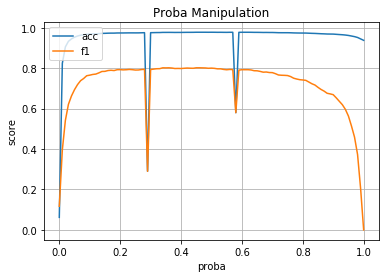

In [489]:
ax = plt.subplot(111)

ax.plot(x1, y1, label='acc')
ax.plot(x1, z1, label='f1')

ax.set(xlabel='proba', ylabel='score', title='Proba Manipulation')
ax.legend(loc='upper left')
ax.grid()

# final

In [607]:
test = pd.read_csv('data_3_test_2.csv', index_col = 'actor_account')

In [608]:
test.head()

,trade_go,trade_come,sell_to_shop,sell_to_person,mail_go,mail_come,invite,join,fight,friend_num,friend_num_change_count,too_much_gain,too_much_AP,trade_go_perday,buy_from_shop_perday,sell_to_shop_perday,mail_come_perday,invite_perday,join_perday,fight_perday,login_count,play_time,max_level,playtime_per_day,abyss,sit_count,exp_get_amout,money_get_count,teleport_count,killed_by_pc,killed_by_npc,reborn_count,sit_count_perday,login_total_day,item_get_count_perday,money_get_count_perday,use_portal_count_perday,teleport_count_perday,total_party_time,sit_count/play_time,killed_by_pc/play_time,killed_by_npc/play_time,total-party_time/play_time,teleport_count/play_time,play_time/login_count,exp_get_amount/play_time,playtime_per_day/login_total_day,max_level/login_count,reborn_count/login_count,sit_count/max_level,play_time/question_count
actor_account,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
20100015,1,0,0,0,0,0,0,2,0,22,2,0,1,0.250000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,29,26537,0,6634.25000,0,32,633778,1,51,20,16,27,8.000000,4,7.750000,0.250000,0.250000,12.750000,28,0.001206,0.000754,0.000603,0.001055,0.001922,915.068965,23.882805,1658.562500,0.000000,0.931034,0.000000,0.000000
20100016,7,3,52,0,17,16,4,9,0,0,0,0,0,1.166667,1.833333,8.666667,2.666667,0.666667,1.500000,0.000000,24,128529,18,21421.50000,0,89,55372170,708,57,20,7,13,14.833333,6,1793.000000,118.000000,0.000000,9.500000,5347,0.000692,0.000156,0.000055,0.041602,0.000443,5355.375000,430.814602,3570.250000,0.750000,0.541667,4.944444,5842.227273
20100017,15,7,314,0,17,19,19,47,1,12,1,0,0,2.142857,10.285714,44.857143,2.714286,2.714286,6.714286,0.142857,178,336731,47,48104.42857,0,176,506868686,4221,516,15,89,79,25.142857,7,15786.571430,603.000000,0.428571,73.714286,7801,0.000523,0.000044,0.000264,0.023167,0.001532,1891.747191,1505.262913,6872.061224,0.264045,0.443820,3.744681,2715.572581
20100021,11,14,265,0,5,4,4,22,0,52,8,0,0,1.571429,7.142857,37.857143,0.571429,0.571429,3.142857,0.000000,90,138319,29,19759.85714,0,147,183334028,1654,240,20,35,41,21.000000,7,12504.571430,236.285714,0.000000,34.285714,3274,0.001063,0.000145,0.000253,0.023670,0.001735,1536.877778,1325.443562,2822.836735,0.322222,0.455556,5.068966,2766.380000
20100029,35,151,228,0,15,21,11,57,2,20,6,0,0,5.000000,12.428571,32.571429,3.000000,1.571429,8.142857,0.285714,107,259596,41,37085.14286,0,200,100158058,1703,289,11,67,54,28.571429,7,3176.428571,243.285714,0.000000,41.285714,67442,0.000770,0.000042,0.000258,0.259796,0.001113,2426.130841,385.822809,5297.877551,0.383178,0.504673,4.878049,1937.283582


In [ ]:
del model_data['sell_to_person']
del model_data['too_much_gain']
del model_data['too_much_AP']
del model_data['abyss']

In [682]:
proba_cb1 = cb_clf1.predict_proba(test)[:,1]

In [683]:
proba_cb2 = cb_clf2.predict_proba(test)[:,1]

In [684]:
proba_cb3 = cb_clf3.predict_proba(test)[:,1]

In [9]:
proba_cb4 = cb_clf4.predict_proba(test)[:,1]

NameError: name 'test' is not defined

In [693]:
proba_cb = (proba_cb1 + proba_cb2 + proba_cb3 + proba_cb4) / 4

In [706]:
final = (proba_cb >= 0.5).astype(int)

In [707]:
sum(final)

483

In [634]:
final = cb_clf4.predict(test)

In [637]:
okay = pd.DataFrame(list(final))

In [639]:
okay.to_csv("final_cb.csv", index=False, header = True)